# NLP (Natural Language Processing) classify spam messages and ham messages
In this project, we will classify the SMS spam messages and ham messages in the [UCI datasets](https://archive.ics.uci.edu/ml/datasets/SMS+Spam+Collection)

In [1]:
import nltk # Imports the library
nltk.download() #Download the necessary datasets

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

## Get the Data

The file we are using contains a collection of more than 5 thousand SMS phone messages. 

Let's get a list of all the lines of text messages:

In [61]:
messages = [line.rstrip() for line in open('smsspamcollection/SMSSpamCollection')]
print(len(messages))

5574


Let's print the first ten messages and number them using **enumerate**:

In [62]:
for message_no, message in enumerate(messages[:10]):
    print(message_no, message)
    print("\n")

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


1 ham	Ok lar... Joking wif u oni...


2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


3 ham	U dun say so early hor... U c already then say...


4 ham	Nah I don't think he goes to usf, he lives around here though


5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv


6 ham	Even my brother is not like to speak with me. They treat me like aids patent.


7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune


8 spam	WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code 

Let's import the data using pandas!

In [63]:
import pandas as pd

We specify the desired column names to be ["label", "message"].

In [64]:
messages = pd.read_csv("smsspamcollection/SMSSpamCollection", sep = "\t",
                           names = ["label", "message"])
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


## Exploratory Data Analysis

Let's check out the descriptive statistics:

In [65]:
messages.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


Let's check out the generate descriptive statistics of ham messapges and spam messages separately. 

In this way we can begin to think about the features that separate ham and spam!

In [66]:
messages.groupby('label').describe() 

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

We found the most popluar ham message is "Sorry, I'll call later" and the most popular spam message is "Please call our customer service representativ..."

Now we need to compare the features of ham messages and spam messages. 

Let's make a new column to detect how long the text messages are:

In [36]:
messages["length"] = messages["message"].apply(len)
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


## Data Visualization

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

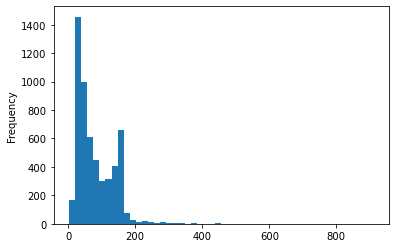

In [38]:
messages['length'].plot(bins = 50, kind = 'hist') 

Text length may be a good feature to classify. 

Let's report the descriptive statistics of text length:

In [39]:
messages.length.describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

We see the longest text message has 910 characters. Let's preview this message:

In [40]:
messages[messages['length'] == 910]["message"].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

Let's analyze if **message length** is a distinguishing feature between ham and spam:

array([<matplotlib.axes._subplots.AxesSubplot object at 0x13d80e4d0>,
      dtype=object)

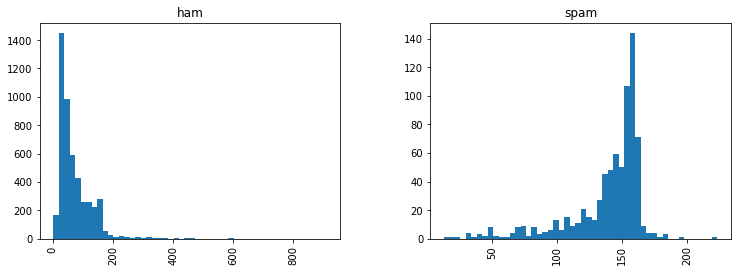

In [41]:
messages.hist(column = "length", by = "label", bins = 50, figsize = (12, 4))

We see a trend that spam messages tend to have more characters. Although some Romeo messages are also very long.

Now let's begin to process the data so we can eventually use it with SciKit Learn!

## Text Pre-processing

Our main issue with our data is that it is all in text format (strings). But we need the numerical feature vector in order to perform the classification task. 


So we convert the raw messages (sequence of characters) into vectors (sequences of numbers).

We define a function to 
- remove the punctuation

- remove the stopwords

- return a list of cleaned text

First, impot a list of english stopwords from NLTK.

In [42]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

Now define the function we descirbed above:

In [54]:
import string

In [55]:
def text_process(mess):
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Now just remove any stopwords
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

## Data Normalization and Train the model

Then we continue to normalize our data:
- use CountVectorizer to convert a collection of text documents to a matrix of token counts
- transform integer counts to weighted TF-IDF scores
- choose Naive Bayes classifier to train on TF-IDF vectors
- write a pipleline of workflow

Import the libraries:

In [68]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

In [69]:
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer = text_process)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB())  # train on TF-IDF vectors w/ Naive Bayes classifier
])

**Train Test Split**

In [71]:
from sklearn.model_selection import train_test_split

msg_train, msg_test, label_train, label_test = train_test_split(messages['message'], messages['label'], 
                                                                test_size = 0.3)

print(len(msg_train), len(msg_test), len(msg_train) + len(msg_test))

3900 1672 5572


**Train the model**

In [72]:
pipeline.fit(msg_train, label_train)

Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer=<function text_process at 0x13d1b1320>, binary=False,
        decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocessor=None,...f=False, use_idf=True)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

## Model evaluation

In [73]:
predictions = pipeline.predict(msg_test)

**Print confusion matrix and classification report**

In [78]:
from sklearn.metrics import confusion_matrix, classification_report

In [81]:
print(confusion_matrix(predictions,label_test))
print("\n")
print(classification_report(predictions,label_test))

[[1421   81]
 [   0  170]]


              precision    recall  f1-score   support

         ham       1.00      0.95      0.97      1502
        spam       0.68      1.00      0.81       170

   micro avg       0.95      0.95      0.95      1672
   macro avg       0.84      0.97      0.89      1672
weighted avg       0.97      0.95      0.96      1672



## Conclusion

All of the ham messages are correctly predicted. But only 68% of spam messages are correctly predicted. The ability of finding all positive instances in ham messages is 95%. 81% of the positive predictions is correct among spam messages group.

The precision is acceptable for now.

The reason of low precision may be we only use the length feature to classify the 2 groups. We may later on chose other features such as the presence of some key ad words.